# **Breast Cancer Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [ ]:
# # Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

### <b>Loading libraries</b>

In [2]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
import cv2
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from keras import optimizers
adam = optimizers.Adam(learning_rate=0.001)


warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# # Storing the path of the data file from the Google drive
# path = '/content/drive/MyDrive/cell_images.zip'

# # The data is provided as a zip file so we need to extract the files from the zip file
# with zipfile.ZipFile(path, 'r') as zip_ref:

#     zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [13]:
# Storing the path of the extracted "train" folder 
train_dir = 'Data/cell_images/train/'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [14]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
# for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
images_path = os.listdir(train_dir )

for i, image_name in enumerate(images_path):
    
    try:
    
        # Opening each image using the path of that image
        image = Image.open(train_dir + image_name)

            # Resizing each image to (64, 64)
        image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
        train_images.append(np.array(image))            
        train_labels.append(1)
        
    except Exception:
        pass

# Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [15]:
# Storing the path of the extracted "test" folder 
test_dir = 'Data/cell_images/test/'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [16]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder

    
    # Path of the folder
images_path = os.listdir(test_dir )

for i, image_name in enumerate(images_path):

    try:
            # Opening each image using the path of that image
        image = Image.open(test_dir +  image_name)
            
            # Resizing each image to (64, 64)
        image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
        test_images.append(np.array(image))            
       
        test_labels.append(1)      


    except Exception:

        pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [17]:
print(test_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


###<b> Checking the shape of train and test images

In [18]:
# Shape of images
print("Shape of train images:", train_images.shape)
print("Shape of test images:", test_images.shape)

Shape of train images: (182, 64, 64, 4)
Shape of test images: (16, 64, 64, 4)


###<b> Checking the shape of train and test labels

In [19]:
# Shape of labels 
# print("label of train images:", train_labels.shape)
print("label of test images:", test_labels.shape)

label of test images: (16,)


####<b> Observations and insights: _____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [20]:
# Try to use min and max function from numpy
# Print the minimum and maximum pixel values for train images
print("Train images min:", np.min(train_images))
print("Train images max:", np.max(train_images))

# Print the minimum and maximum pixel values for test images
print("Test images min:", np.min(test_images))
print("Test images max:", np.max(test_images))

Train images min: 0
Train images max: 255
Test images min: 0
Test images max: 255


####<b> Observations and insights: _____



###<b> Count the number of values in both uninfected and parasitized 

###<b>Normalize the images

In [21]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')

####<b> Observations and insights: _____

###<b> Plot to check if the data is balanced

####<b> Observations and insights: _____

### <b>Data Exploration</b>
Let's visualize the images from the train data

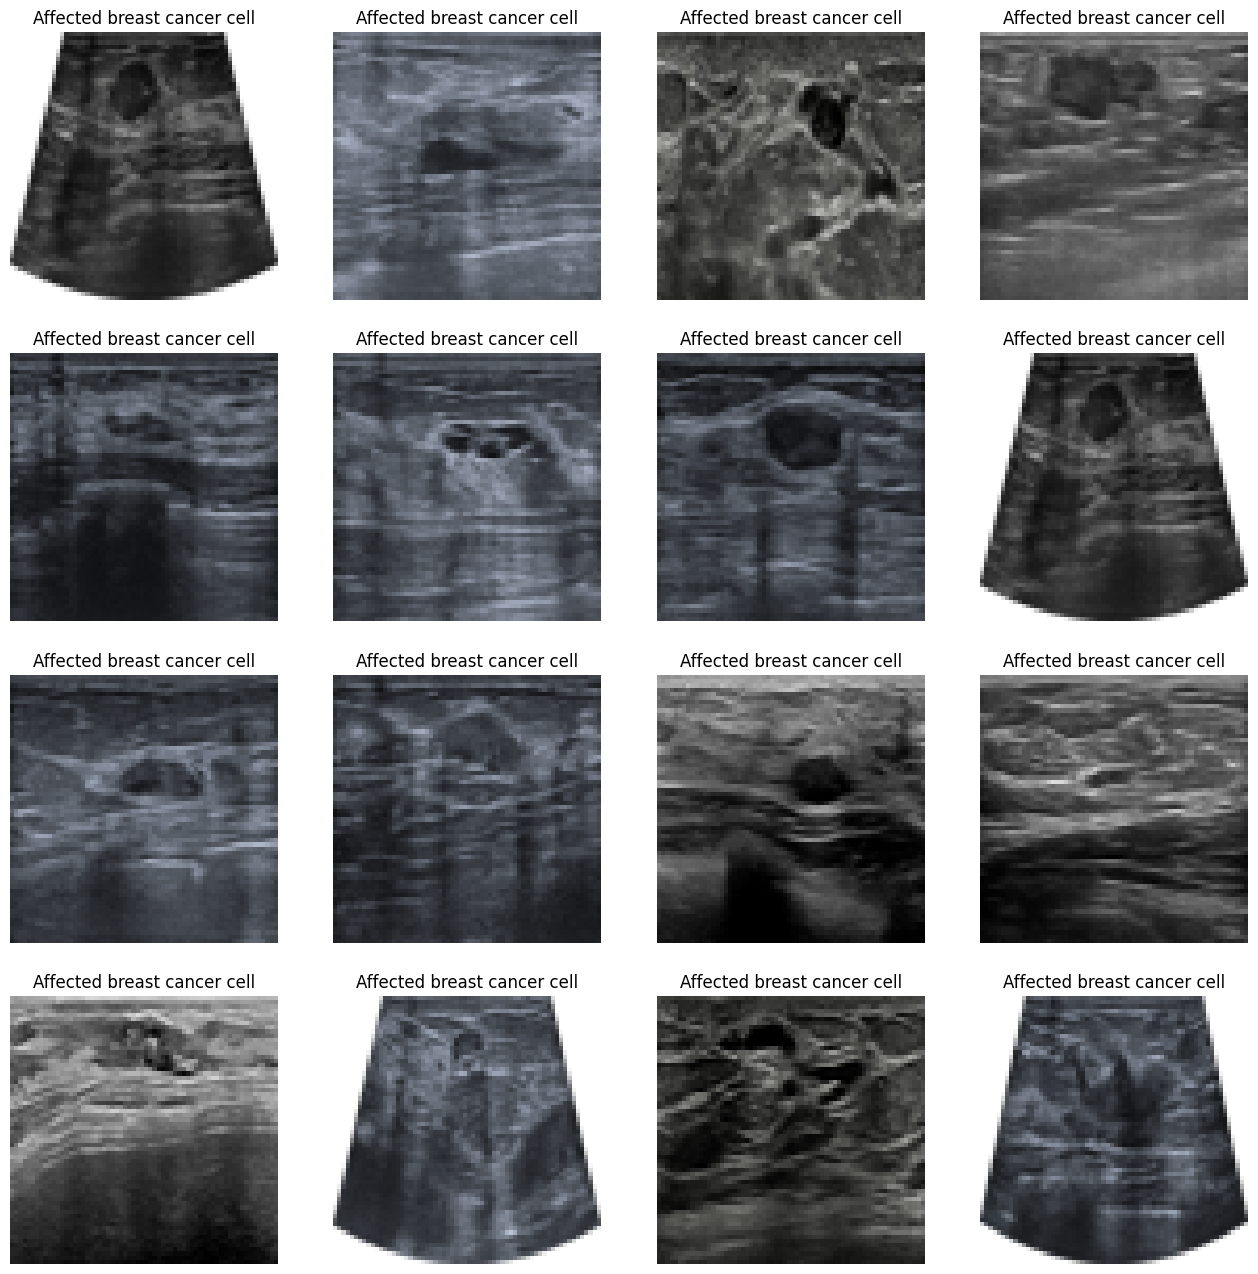

In [22]:
# This code will help you in visualizing both the Images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))
    plt.title('Affected breast cancer cell')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: _____

###<b> Plotting the mean images for parasitized and uninfected

In [23]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

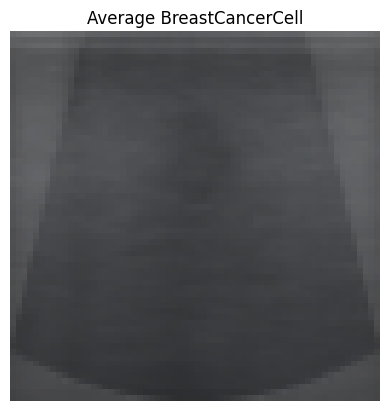

In [24]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'BreastCancerCell')   # find the mean

####<b> Observations and insights: _____

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [26]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


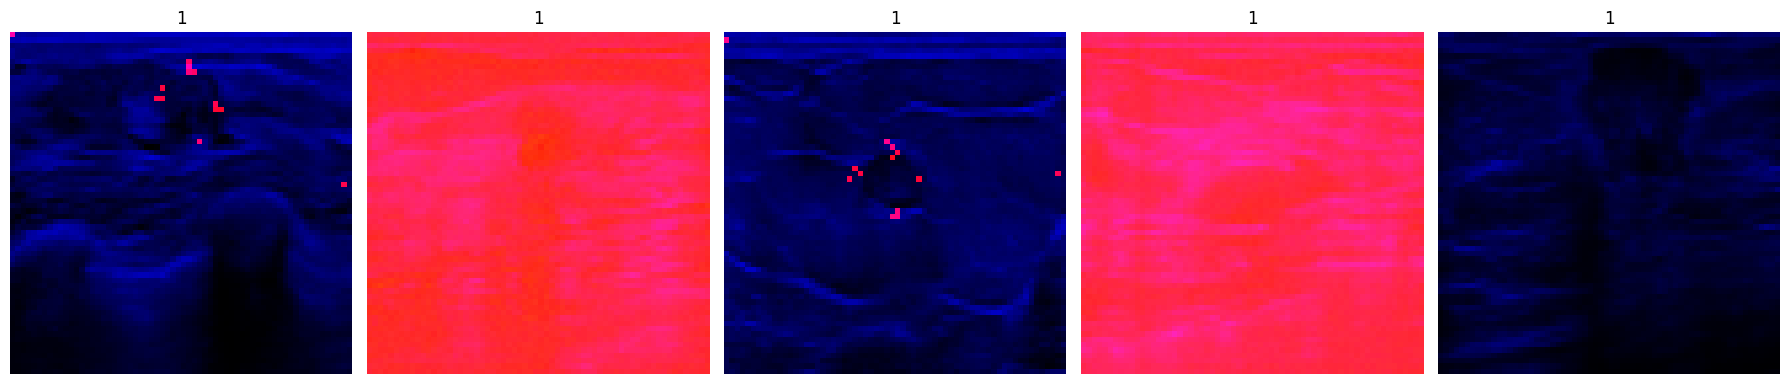

In [27]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [28]:
# Similarly you can visualize for the images in the test data
gfxtest=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfxtest.append(a)

gfxtest = np.array(gfxtest)

IndexError: index 16 is out of bounds for axis 0 with size 16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


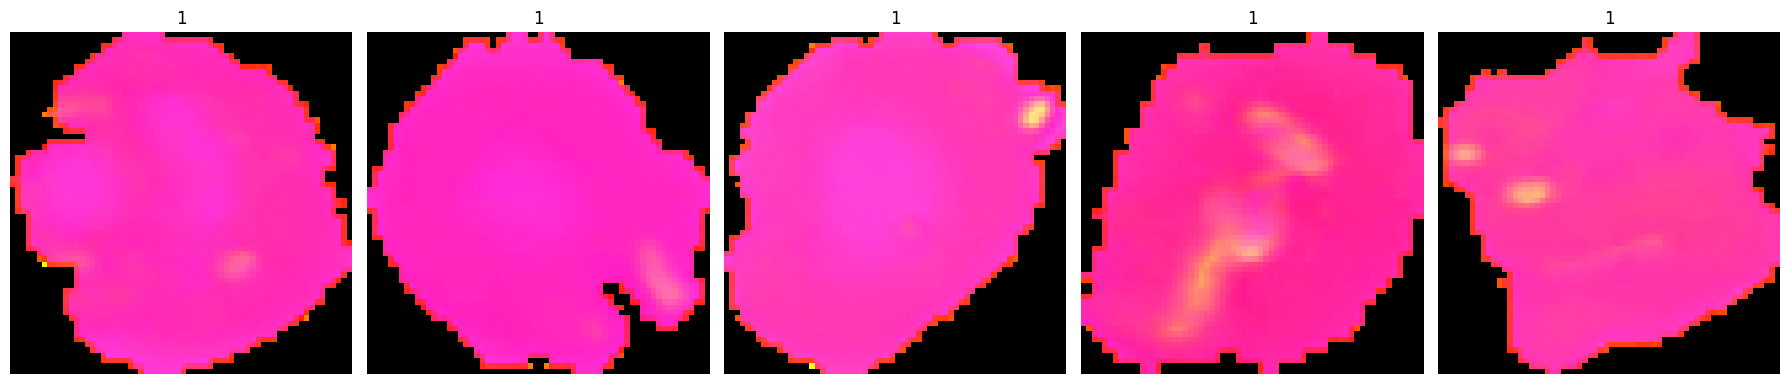

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfxtest[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights: _____

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

In [ ]:
# # Convert the train and test labels to one hot vectors using tf.one_hot function
# train_labels = tf.one_hot(train_labels, depth=2)
# test_labels = tf.one_hot(test_labels, depth=2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
def cnn_BaseModel():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.2))

    model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.2))

    model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

    model.add(MaxPooling2D(pool_size = 2))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(512, activation = "relu"))

    model.add(Dropout(0.4))

    model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

    return model

In [ ]:
cnn_BaseModel = cnn_BaseModel()

In [ ]:
cnn_BaseModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
cnn_BaseModel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = cnn_BaseModel.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 135s 213ms/step - loss: 0.3805 - accuracy: 0.8259 - val_loss: 0.1685 - val_accuracy: 0.9561
Epoch 2/20
624/624 [==============================] - 129s 207ms/step - loss: 0.1153 - accuracy: 0.9551 - val_loss: 0.1945 - val_accuracy: 0.9517
Epoch 3/20
624/624 [==============================] - 126s 201ms/step - loss: 0.0980 - accuracy: 0.9692 - val_loss: 0.1317 - val_accuracy: 0.9824
Epoch 4/20
624/624 [==============================] - 123s 197ms/step - loss: 0.0793 - accuracy: 0.9751 - val_loss: 0.0905 - val_accuracy: 0.9822
Epoch 5/20
624/624 [==============================] - 129s 207ms/step - loss: 0.0732 - accuracy: 0.9770 - val_loss: 0.0991 - val_accuracy: 0.9796
Epoch 6/20
624/624 [==============================] - 122s 196ms/step - loss: 0.0666 - accuracy: 0.9784 - val_loss: 0.1065 - val_accuracy: 0.9794


###<b> Evaluating the model on test data

In [ ]:
accuracy = cnn_model_1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 5s 40ms/step - loss: 0.1013 - accuracy: 0.9785

 Test_Accuracy:- 0.9784615635871887


<b> Plotting the confusion matrix

82/82 [==============================] - 4s 40ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



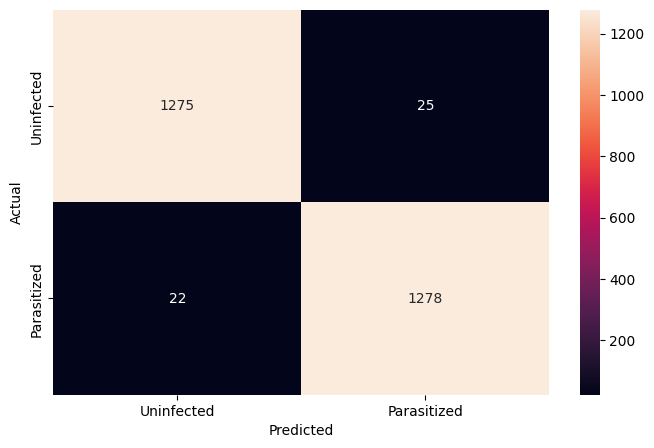

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = cnn_BaseModel.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

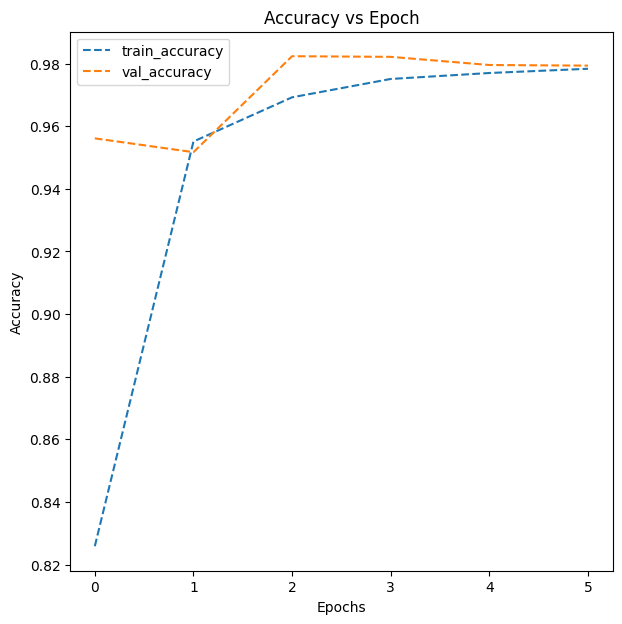

In [ ]:
plot_accuracy(history)

###Base Model Observation 

- We can see from the above plot that the model has done better on the validation data. Train accuracy and val accuracy is almost matching each other after 4 epochs
- The validation accuracy has become more  constant after 5 epochs.

Traceability matrix shows Precision and recall of the model is 98% accurate 

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers
